In [1]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display, HTML

import matplotlib.pyplot as plt
import seaborn as sns




# TP 2 - UN PRIMER ENCUENTRO CON LA EPH

### Parte 1


**EXPLICAR CÓMO EL INDEC IDENTIFICA A LAS PERSONAS POBRES.**

Se realiza mediante el método de medición indirecta, que evalúa si los ingresos de los hogares son insuficientes para cubrir necesidades básicas.

Este proceso incluye:

- **Cálculo de la Canasta Básica Alimentaria (CBA)**  
  Define el costo mínimo de alimentos esenciales para satisfacer requerimientos calóricos y nutricionales.  
  Los hogares cuyos ingresos no alcanzan para cubrir la CBA se consideran en indigencia.

- **Cálculo de la Canasta Básica Total (CBT)**  
  Incluye la CBA más bienes y servicios no alimentarios (vivienda, educación, salud, transporte, etc.).  
  Los hogares con ingresos inferiores a la CBT se clasifican como pobres no indigentes.

- **Recolección de datos mediante la Encuesta Permanente de Hogares (EPH)**  
  El INDEC utiliza esta encuesta para obtener información sobre ingresos familiares y características socioeconómicas, lo que permite compararlos con los umbrales de CBA y CBT.


### Parte 2  

Descargar las bases de datos de Individuos y Hogares del primer trimestre de 2005 y 2025.  
Elegir una región y 15 variables para trabajar.  
Unir los dataframes de Individuos y de Hogares y cruzarlos entre sí.

### Punto 2.a  

A partir de ahora, cada grupo debe decidir trabajar con una región del país en específico y mantener dicha región  
en los próximos trabajos prácticos (ver variable REGION). Eliminen los datos de todas aquellas regiones que no  
se encuentren dentro de su región y unan ambos trimestres (2005 y 2025) en una sola base.  

Note el tipo de variables (*string* vs. *byte* o *float*) entre las dos bases de datos de 2005 y 2025.  
Deberán unificar todo con un solo tipo de variables de las 15 seleccionadas en el ítem 2.b.


In [2]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')


In [3]:

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

#Seteo el tamaño de las Columnas y Filas que me muestra Jupiter
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 20)

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION
print(t0105.dtypes)
print(t0125.dtypes)

CODUSU          object
nro_hogar      float64
componente    category
h15           category
ano4           float64
                ...   
adeccfr         object
pj1_1         category
pj2_1         category
pj3_1         category
idimpp          object
Length: 176, dtype: object
CODUSU         object
ANO4            int64
TRIMESTRE       int64
NRO_HOGAR       int64
COMPONENTE      int64
               ...   
P_RDECCF      float64
P_GDECCF      float64
P_PDECCF      float64
P_IDECCF      float64
P_ADECCF      float64
Length: 235, dtype: object


In [4]:

#PRIMERO VOY ESTABLECER LAS FILAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS
#QUE SON LA DE LOS AGLOMERADOS DE LA REGION NOA

categorias = ['Santiago del Estero - La Banda', 'Salta', 'La Rioja', 'Gran Catamarca', 'Jujuy - Palpalá','Gran Tucumán - Tafí Viejo']
sel_t0105_1 = t0105[t0105['aglomerado'].isin(categorias)].copy()


categorias2 = [18,19,22,23,25,29]
sel_t0125_1 = t0125[t0125['AGLOMERADO'].isin(categorias2)].copy()

### Punto 2.b y 2.c  

Seleccione 15 variables de interés (entre las cuales tienen que estar: `CH04`, `CH06`, `CH07`, `CH08`, `NIVEL ED`, `ESTADO`, `CAT_INAC`, `IPCF`)  
y reporten en una figura de *heatmap* la cantidad de valores faltantes para cada año (`NA` o `NaN` en Python) en una tabla por cada año.  

Comenten qué variables de las 15 que seleccionaron tienen más valores faltantes y en qué año.


In [5]:

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

sel_t0105 = sel_t0105_1[[
'CODUSU', 'nro_hogar', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch14', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp04b_cod', 'ipcf','itf'
]].copy()

sel_t0125 = sel_t0125_1[[
'CODUSU', 'NRO_HOGAR', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF','ITF'
]].copy()



In [6]:
#CREO UNA FUNCION QUE ME TRANSFORME EL TIPO DE DATO DE LA COLUMNA EN CUESTION.
#LE DEBO CARGAR EL NOMBRE DEL DATAFRAME, EL NOMBRE DE LA COLUMNA Y EL MAPEO DE DATOS QUE DEBE TRANSFORMAR

def mapear_columna(df, columna, diccionario):
    
    #Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
    errores = []

    # Asegura que la columna esté en formato string para comparar
    df[columna] = df[columna].astype(str)

    #Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
    #Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.
    
    for i in df.index:
        valor = df.at[i, columna]
        if valor in diccionario:
            df.at[i, columna] = diccionario[valor]
        else:
            errores.append((i, valor))

    # Convierte la columna al tipo int64 si todo salió bien
    try:
        df[columna] = df[columna].astype('int64')
    except ValueError:
        pass  # Si hay errores, no se puede convertir

    return df, errores

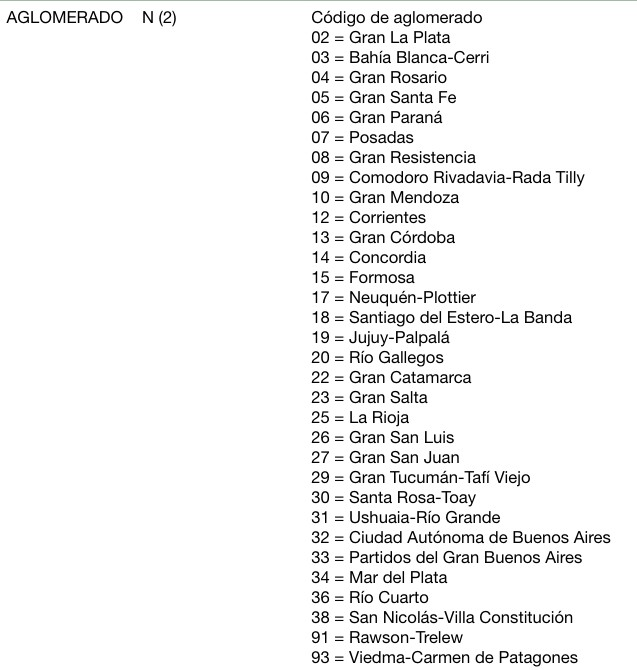

In [7]:
# Aqui empiezo a homogeneizar las bases de datos para poder filtrar y unificarlas.


#AGLOMERADOS: Del listado me voy a quedar solo con la región NOA

display(Image(filename='C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs/AGLOMERADO.jpg'))



In [8]:
mapa = {
    'Santiago del Estero - La Banda': 18,    'Jujuy - Palpalá': 19,
    'Gran Catamarca': 22,    'Salta': 23,
    'La Rioja': 25,          'Gran Tucumán - Tafí Viejo': 29
}

sel_t0105, errores = mapear_columna(sel_t0105, 'aglomerado', mapa)

#print(sel_t0105['aglomerado'].head())
#print(f"Errores encontrados: {len(errores)}")

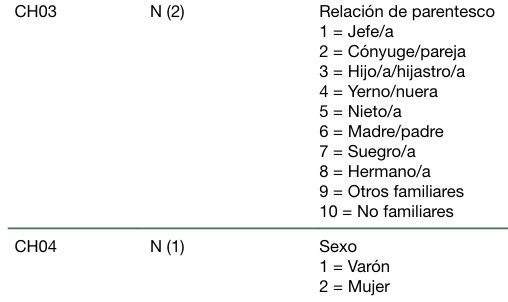

In [9]:
# DE AQUI EN ADELANTE, REPITO EL PROCESO ANTERIOR PARA LAS SIGUINTES COLUMNAS 

#Utilizo como referencia la codificacion de cada columna que figura en los pdf´s EPH_Diccionario 
display(Image(filename=r'C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs/GP_SEXO.jpg'))


In [10]:

#Defino el diccionario de valores que debe buscar y reemplazar
ch03_map = {
    'Jefe/a': 1,     'Jefe': 1,
    'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,
    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
    'Yerno/nuera': 4,        'Yerno/Nuera': 4,
    'Nieto/a': 5,            'Nieto': 5,
    'Madre/padre': 6,         'Madre/Padre': 6,
    'Suegro/a': 7,             'Suegro': 7,
    'Hermano/a': 8,              'Hermano': 8,
    'Otros familiares': 9,
    'No familiares': 10
}


sel_t0105, errores = mapear_columna(sel_t0105, 'ch03', ch03_map)


In [11]:
# tomare a la variable sexo de SEXO con una Dummies, en los 2 años, recodificandola en 0 y 1.

sel_t0105['ch04'] = np.where(sel_t0105['ch04'] == 'Varón', 1, 0)

sel_t0125['CH04'] = np.where(sel_t0125['CH04'] == 1,1,0)

#una vez recodificado transformo el tipo de dato
sel_t0105['ch04'] = sel_t0105['ch04'].astype('int64')


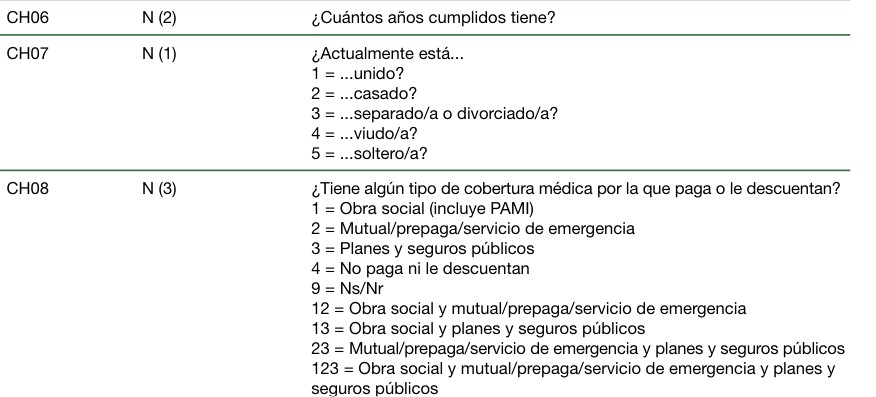

In [12]:
display(Image(filename=r'C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs/EDAD_ECIVIL_OS.jpg'))

In [13]:
# Para el punto 2.C
#Excluimos los valores de EDAD-ch06 fuera de rango, que son aquellos de menos de un año y los mayores de 98 .. Pueden ser errores de carga

###########################################
#Para el 2005
sel_t0105['ch06'] = sel_t0105['ch06'].astype(str)

sel_t0105 = sel_t0105.loc[
    (sel_t0105['ch06'] != 'Menos de 1 año') & 
    (sel_t0105['ch06'] != '98 y más años')
]

sel_t0105['ch06'] = pd.to_numeric(sel_t0105['ch06'], errors='coerce')

###########################################

#Para el 2025
sel_t0125['CH06'] = sel_t0125['CH06'].astype(str)

sel_t0125 = sel_t0125.loc[
    (sel_t0125['CH06'] != 'Menos de 1 año') & 
    (sel_t0125['CH06'] != '98 y más años') &
    (sel_t0125['CH06'] != '103') &
    (sel_t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
sel_t0125['CH06'] = pd.to_numeric(sel_t0125['CH06'], errors='coerce')


In [14]:

#Para estado civil

mapa = {    'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }

sel_t0105, errores = mapear_columna(sel_t0105, 'ch07', mapa)

#print(sel_t0105['aglomerado'].head())
#print(f"Errores encontrados: {len(errores)}")



In [15]:
#Para cobertura medica

#Diccionario para transformar
mapa = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

sel_t0105, errores = mapear_columna(sel_t0105, 'ch08', mapa)



In [16]:
#Para el último año que aprobo

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

sel_t0105['ch14'] = sel_t0105['ch14'].str.strip()

sel_t0105['ch14'] = pd.to_numeric(sel_t0105['ch14'], errors='coerce')


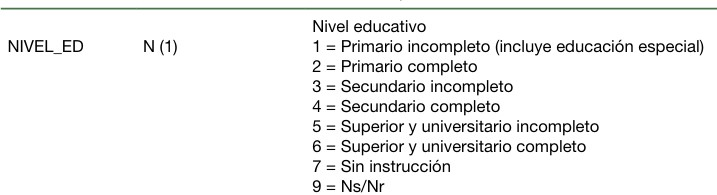

In [17]:
display(Image(filename=r'C:/Users/Rafael/Desktop/tpfinal/BigDataUBA-Grupo3-main/TP1-Grupo3/TP2/inputs/N_EDUC.jpg'))

In [18]:
#Para el Nivel educativo

mapa = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

sel_t0105, errores = mapear_columna(sel_t0105, 'nivel_ed', mapa)



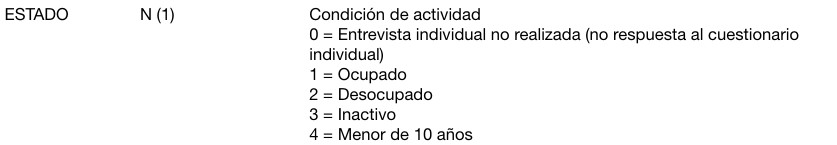

In [19]:
display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\EST_LABORAL.jpg"))

In [20]:
#Para la condicion de actividad

mapa = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

sel_t0105, errores = mapear_columna(sel_t0105, 'estado', mapa)


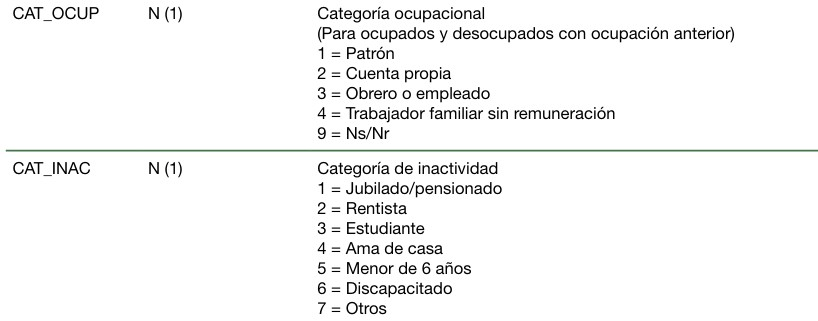

In [21]:
display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\OCUP_DESOCUP.jpg"))

In [22]:
#Para la categoria ocupacional

mapa = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }

sel_t0105, errores = mapear_columna(sel_t0105, 'cat_ocup', mapa)

sel_t0105['cat_ocup'] = pd.to_numeric(sel_t0105['cat_ocup'], errors='coerce')

#CAT_INAC

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
                 }
sel_t0105, errores = mapear_columna(sel_t0105, 'cat_inac', cat_inac_map)


sel_t0105['cat_inac'] = pd.to_numeric(sel_t0105['cat_inac'], errors='coerce')

In [23]:
# Se termina de limpiar datos de ambas bases. Para puntos 2.b y 2.c

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

sel_t0105['cat_inac'] = sel_t0105['cat_inac'].replace(0, np.nan)
sel_t0125['CAT_INAC'] = sel_t0125['CAT_INAC'].replace(0, np.nan)

sel_t0105['cat_ocup'] = sel_t0105['cat_ocup'].replace(0, np.nan)
sel_t0125['CAT_OCUP'] = sel_t0125['CAT_OCUP'].replace(0, np.nan)

#Como en 2025, la columna de esta columna no figura como nulo pero en la de 2025 si, voy transformar el dato de 2005


sel_t0105['pp04b_cod'] = pd.to_numeric(sel_t0105['pp04b_cod'], errors='coerce')
sel_t0105['pp04b_cod'] = sel_t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
sel_t0125['PP04B_COD'] = pd.to_numeric(sel_t0125['PP04B_COD'], errors='coerce')



In [24]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

sel_t0105 = sel_t0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp04b_cod': 'PP04B_COD',
'ipcf': 'IPCF',
 'itf' : 'ITF'    
})

print(sel_t0105.dtypes)



CODUSU         object
NRO_HOGAR     float64
AGLOMERADO      int64
PONDERA       float64
CH03            int64
CH04            int64
CH06          float64
CH07            int64
CH08            int64
CH14          float64
NIVEL_ED        int64
ESTADO          int64
CAT_OCUP      float64
CAT_INAC      float64
PP04B_COD     float64
IPCF          float64
ITF           float64
dtype: object


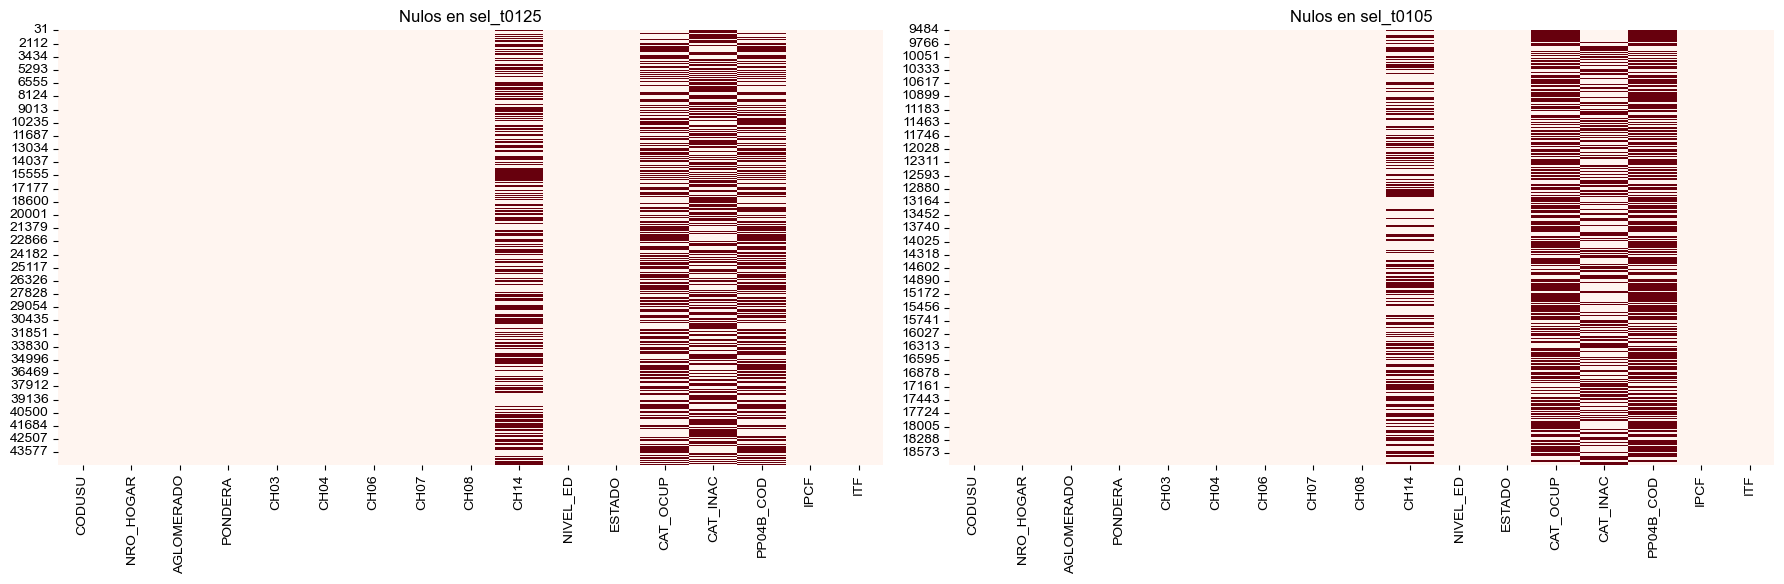

Nulos en sel_t0125:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4784
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5167
CAT_INAC      4592
PP04B_COD     5337
IPCF             0
ITF              0
dtype: int64

Nulos en sel_t0105:
CODUSU           0
NRO_HOGAR        0
AGLOMERADO       0
PONDERA          0
CH03             0
CH04             0
CH06             0
CH07             0
CH08             0
CH14          4010
NIVEL_ED         0
ESTADO           0
CAT_OCUP      5420
CAT_INAC      3875
PP04B_COD     5767
IPCF             0
ITF              0
dtype: int64


In [25]:
#Ahora paso a analizar los nulos de las columnas de ambos DataFrames. Punto 2.b

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Aqui elijo el estilo
sns.set(style="whitegrid")


# Mapas de calor para las Selecciones

# Para 2025
sns.heatmap(sel_t0125.isnull(), cbar=False, ax=axes[0], cmap="Reds")
axes[0].set_title("Nulos en sel_t0125")

# Para 2005
sns.heatmap(sel_t0105.isnull(), cbar=False, ax=axes[1], cmap="Reds")
axes[1].set_title("Nulos en sel_t0105")


#Junto los 2 Mapas para verlos 
plt.tight_layout()
plt.show()

#Creo una tabla con un conteo de nulos en las columnas que le den fundamento al comentario pedido en el 2.b

print("Nulos en sel_t0125:")
print(sel_t0125.isnull().sum())

print("\nNulos en sel_t0105:")
print(sel_t0105.isnull().sum())

El grafico nos revela que solo hay 4 variables con datos nulos. 
Entre los 2 trimestre pueden observarse cantidades no muy diferentes, con 2 variables en crecimiento y 2 en decrecimiento 

In [27]:
#Ahora uno a las 2 bases de datos individuales del 2.a

sel_indiv = pd.concat([sel_t0125, sel_t0105], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_indiv


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,ITF
0,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,1,0,73.0,5,1.0,NaN,2,3,NaN,1.0,NaN,198750.0,1590000.0
1,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,3,0,38.0,5,1.0,NaN,4,1,3.0,NaN,9700.0,198750.0,1590000.0
2,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,0,34.0,5,1.0,NaN,6,1,3.0,NaN,9700.0,198750.0,1590000.0
3,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,19.0,5,1.0,2.0,3,3,NaN,7.0,NaN,198750.0,1590000.0
4,TQRMNORWTHJOKOCDEGPDJ00875828,1.0,19,200.0,5,1,16.0,5,1.0,NaN,2,3,NaN,7.0,NaN,198750.0,1590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,287879,1.0,29,266.0,3,0,10.0,5,2.0,4.0,1,3,NaN,3.0,NaN,130.0,390.0
18868,288077,1.0,29,555.0,1,1,31.0,2,1.0,NaN,6,1,3.0,NaN,5306.0,562.5,2250.0
18869,288077,1.0,29,555.0,2,0,29.0,2,1.0,NaN,6,3,NaN,4.0,NaN,562.5,2250.0
18870,288077,1.0,29,555.0,3,1,4.0,5,1.0,NaN,7,4,NaN,5.0,NaN,562.5,2250.0


### Punto 2.d  

*(Opcional)* De la base de datos de Hogares, de ambos años, seleccione y limpie a un único formato las siguientes variables: `IV1`, `IV2`, `IV6`, `IV8` e `II8`.  

Pruebe unir la base de datos de **Individuales** con **Hogares** usando `CODUSU` y `NRO_HOGAR`, empleando los cuatro tipos de uniones que vimos en la clase tutorial.


In [28]:
#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
th0125 = pd.read_excel('usu_hogar_T125.xlsx')
#th0125

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
th0105 = pd.read_stata('Hogar_t105.dta')


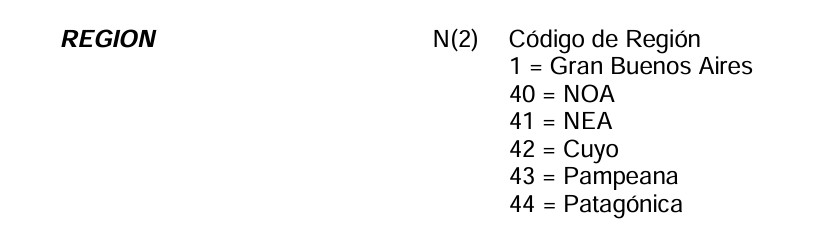

In [29]:
#Traigo los datos del diccionario sobre la columna region, que será mi filtro de filas.
display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\REGION.jpg"))


In [30]:
#Selecciono  las filas y columnas con la que trabajaré de cada trimestre

sel_th0105 = th0105.loc[th0105['region'] == 'NOA', ['CODUSU','nro_hogar','iv1', 'iv2', 'iv6', 'iv8', 'ii8']].copy()
#sel_th0105

sel_th0125 = th0125.loc[th0125['REGION'] == 40, ['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8']].copy()
#sel_th0125

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION

print(sel_th0125.dtypes)
print(sel_th0105.dtypes)

CODUSU       object
NRO_HOGAR     int64
IV1           int64
IV2           int64
IV6           int64
IV8           int64
II8           int64
dtype: object
CODUSU         object
nro_hogar     float64
iv1          category
iv2          category
iv6          category
iv8          category
ii8          category
dtype: object


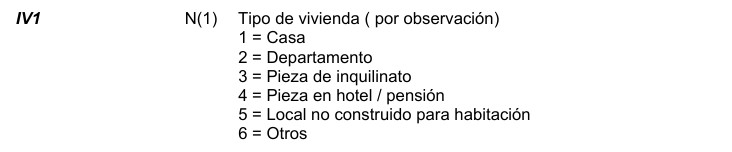

In [31]:

display(Image(filename=r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\IV1.jpg"))


In [32]:
#Ahora empezamos la transformacion de los tipos de datos para poder unificar ambos DF

#Para el NRO_HOGAR, llevamos al de 2005 al mismo que tiene el del 2025 aunque ambos sean numericos.
sel_th0105['nro_hogar'] = sel_th0105['nro_hogar'].astype('int64')

#Para TIPO DE VIVIENDA

#Defino el diccionario de valores que debe buscar y reemplazar
iv1_map = {
    'Casa': 1,     'Departamento': 2,
    'Pieza  de inquilinato': 3,    'Pieza  de hotel/Pensión': 4,
    'Local no construido para habitacion': 5,  'Otros': 6
}

sel_th0105, errores = mapear_columna(sel_th0105, 'iv1', iv1_map)

#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['iv1'] = pd.to_numeric(sel_th0105['iv1'], errors='coerce')

#Para EN CUANTOS AMBIENTES VIVE

#Aqui solo transformo el tipo de dato a numerico. La opcion errors='coerce' deja el dato como NA´s.
sel_th0105['iv2'] = pd.to_numeric(sel_th0105['iv2'], errors='coerce')


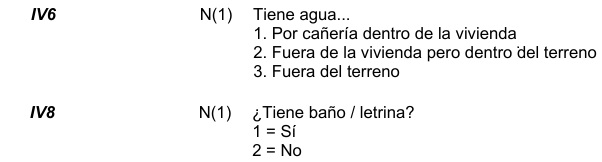

In [33]:

display(Image(filename=r'C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\IV_6_8.jpg'))


In [34]:
#Para TIENE AGUA

#Defino el diccionario de valores que debe buscar y reemplazar
iv6_map = {
    'Por cañeria dentro de la vivienda': 1,     'Fuera de la vivienda pero dentro del terreno': 2,    'Fuera del terreno': 3
            }
#Para meter los errores en una lista que vaya encontrado la transformacion y después que pueda imprimir y ver de corregirlos

sel_th0105, errores = mapear_columna(sel_th0105, 'iv6', iv6_map)

#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['iv6'] = pd.to_numeric(sel_th0105['iv6'], errors='coerce')


In [35]:
# tomare a la variable de TIENE LETRINA con una Dummies, recodificandola en 0 y 1.

sel_th0105['iv8'] = np.where(sel_th0105['iv8'] == 'Sí', 1, 0)

#una vez recodificado transformo el tipo de dato
sel_th0105['iv8'] = sel_th0105['iv8'].astype('int64')


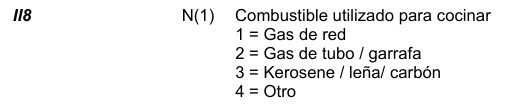

In [36]:

display(Image(filename=r'C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\inputs\Ii8.jpg'))


In [37]:
#Para COMBUSTIBLE PARA COCINAR

#Defino el diccionario de valores que debe buscar y reemplazar
ii8_map = {
    'Gas de red': 1,     'Gas de tubo/garrafa': 2,    'Kerosene/leña/carbon': 3,    'Otro': 4
            }

sel_th0105, errores = mapear_columna(sel_th0105, 'ii8', ii8_map)

#una vez recodificado transformo el tipo de dato a numerico
sel_th0105['ii8'] = pd.to_numeric(sel_th0105['ii8'], errors='coerce')

In [38]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

sel_th0105 = sel_th0105.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'iv1': 'IV1',
'iv2': 'IV2',
'iv6': 'IV6',
'iv8': 'IV8',
'ii8': 'II8'
})

sel_th0105

,CODUSU,NRO_HOGAR,IV1,IV2,IV6,IV8,II8
6161,125666,1,1.0,1.0,2.0,1,NaN
6162,126344,1,1.0,6.0,NaN,1,1.0
6163,127081,1,1.0,3.0,NaN,1,1.0
6164,127095,1,1.0,4.0,NaN,1,1.0
6165,127117,1,1.0,3.0,2.0,1,2.0
...,...,...,...,...,...,...,...
9369,287167,1,1.0,2.0,NaN,1,2.0
9370,287482,1,1.0,3.0,NaN,1,1.0
9371,287622,1,1.0,5.0,NaN,1,1.0
9372,287879,1,1.0,4.0,NaN,1,1.0


In [39]:
#Aqui unifico los 2 trimestres en un solo dataframe de Hogares
sel_hogar = pd.concat([sel_th0125, sel_th0105], axis=0, ignore_index=True)
#sel_hogar


In [40]:
# Ahora se va a cruzar los dataframes de individuos y hogares
union_eph = pd.merge(sel_indiv,sel_hogar, on=('CODUSU','NRO_HOGAR'), how='outer')

#Con todas las columnas seleccionadas
union_eph[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8','AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP04B_COD', 'IPCF'
]]

,CODUSU,NRO_HOGAR,IV1,IV2,IV6,IV8,II8,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF
0,125029,1.0,1.0,4.0,NaN,1,1.0,29.0,196.0,1.0,1.0,58.0,2.0,1.0,NaN,6.0,3.0,NaN,1.0,NaN,423.0
1,125029,1.0,1.0,4.0,NaN,1,1.0,29.0,196.0,2.0,0.0,55.0,2.0,1.0,NaN,2.0,3.0,NaN,1.0,NaN,423.0
2,125029,1.0,1.0,4.0,NaN,1,1.0,29.0,196.0,3.0,0.0,24.0,5.0,2.0,NaN,4.0,2.0,3.0,NaN,NaN,423.0
3,125029,1.0,1.0,4.0,NaN,1,1.0,29.0,196.0,3.0,1.0,26.0,5.0,2.0,4.0,5.0,2.0,NaN,NaN,NaN,423.0
4,125029,1.0,1.0,4.0,NaN,1,1.0,29.0,196.0,7.0,0.0,79.0,5.0,1.0,NaN,7.0,3.0,NaN,1.0,NaN,423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18868,TQUMNOSTXHKOKNCDEHPJB00863275,1.0,2.0,2.0,1.0,1,2.0,29.0,480.0,3.0,0.0,12.0,5.0,1.0,1.0,3.0,3.0,NaN,3.0,NaN,265000.0
18869,TQVMNOQXXHLNKOCDEGOIH00853402,1.0,2.0,1.0,2.0,1,2.0,18.0,261.0,1.0,1.0,31.0,1.0,4.0,NaN,2.0,1.0,1.0,NaN,4000.0,195250.0
18870,TQVMNOQXXHLNKOCDEGOIH00853402,1.0,2.0,1.0,2.0,1,2.0,18.0,261.0,2.0,0.0,23.0,1.0,4.0,NaN,2.0,3.0,NaN,4.0,NaN,195250.0
18871,TQVMNOQXXHLNKOCDEGOIH00853402,1.0,2.0,1.0,2.0,1,2.0,18.0,261.0,3.0,1.0,5.0,5.0,4.0,0.0,1.0,4.0,NaN,5.0,NaN,195250.0


In [41]:
# Ahora se va a cruzar los dataframes de individuos
tipos = ['inner', 'left', 'right', 'outer']
resultados = {}

for tipo in tipos:
    df = pd.merge(sel_indiv, sel_hogar, on=('CODUSU','NRO_HOGAR'), how=tipo)
    filas, columnas = df.shape
    total_nas = df.isna().sum().sum()
    resultados[tipo] = {
        'Filas': filas,
        'Columnas': columnas,
        'Total_NAs': total_nas
    }

# Mostrar resultados
for tipo, info in resultados.items():
    print(f"\nMerge tipo: {tipo.upper()}")
    print(f"Filas: {info['Filas']}")
    print(f"Columnas: {info['Columnas']}")
    print(f"Total de NAs: {info['Total_NAs']}")


Merge tipo: INNER
Filas: 18872
Columnas: 22
Total de NAs: 47098

Merge tipo: LEFT
Filas: 18872
Columnas: 22
Total de NAs: 47098

Merge tipo: RIGHT
Filas: 18873
Columnas: 22
Total de NAs: 47113

Merge tipo: OUTER
Filas: 18873
Columnas: 22
Total de NAs: 47113


# Parte 2
 Analisis exploratorio

### Punto 3  

Realicen un gráfico de barras mostrando la composición por sexo para 2005 y 2025 en su región.  
Comenten los resultados.

In [42]:
#importo los datos trabajdos en el primer punto de 2005 y 2025

df2005 = sel_t0105[['CH06', 'CH04']].copy()
df2025 = sel_t0125[['CH06', 'CH04']].copy()


#calculamos el porcentaje de muejers y hombres para cada año

por_var_2005 = (df2005['CH04'] == 1).mean() * 100
por_muj_2005 = 100 - por_var_2005
por_var_2025 = (df2025['CH04'] == 1).mean() * 100
por_muj_2025 = 100 - por_var_2025

print(por_var_2005)
print(por_var_2025)
print(por_muj_2005)
print(por_muj_2025)

48.224787627967764
47.997936016511865
51.775212372032236
52.002063983488135


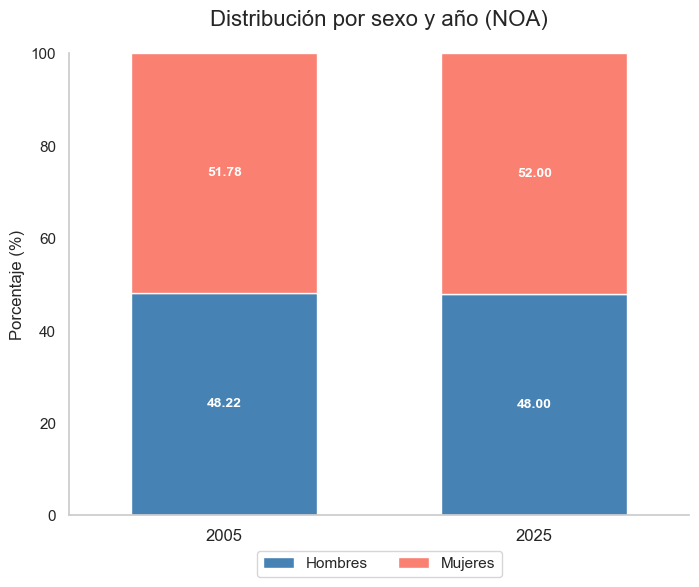

In [43]:
# --- Configuración del gráfico ---

labels = ['2005', '2025']
porcentajes_hombres = [por_var_2005, por_var_2025]
porcentajes_mujeres = [por_muj_2005, por_muj_2025]
width = 0.6  # Ancho de las barras

fig, ax = plt.subplots(figsize=(8, 6))
x = np.arange(len(labels))

# --- Dibujar la barra de hombres ---

ax.bar(x, porcentajes_hombres, width, label='Hombres', color='steelblue')

# --- Dibujar la barra de mujeres (apilada) ---

ax.bar(x, porcentajes_mujeres, width, bottom=porcentajes_hombres, label='Mujeres', color='salmon')

# --- Añadir los valores de porcentaje en el gráfico ---

def add_labels(bar_container):
    for rect in bar_container:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='center', fontsize=10, color='white', fontweight='bold')

add_labels(ax.containers[0])
add_labels(ax.containers[1])

# --- Personalizar el gráfico ---

ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Distribución por sexo y año (NOA)', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, 100)
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0)
ax.set_xlim(-0.5, 1.5)

plt.show()

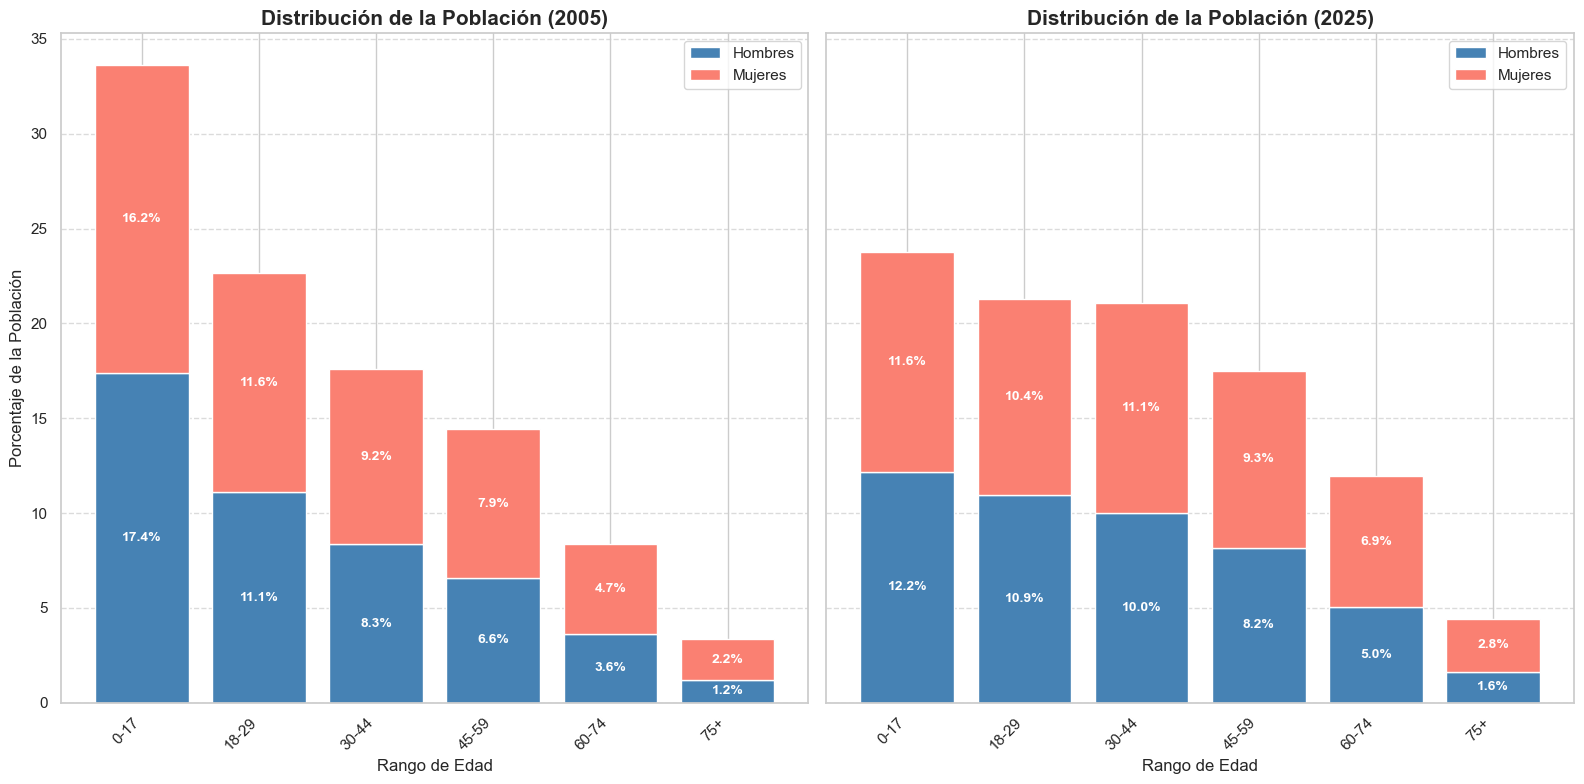

In [72]:
# Asumimos que tus DataFrames 'df2005' y 'df2025' ya están cargados.

# Definir los rangos de edad y sus etiquetas
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']

# Asignar cada edad a su rango
df2005['rango_edad'] = pd.cut(df2005['CH06'], bins=bins, labels=labels, right=False)
df2025['rango_edad'] = pd.cut(df2025['CH06'], bins=bins, labels=labels, right=False)

# Contamos el número de personas por rango de edad y sexo
conteo_2005 = df2005.groupby(['rango_edad', 'CH04'], observed=True).size().unstack(fill_value=0)
conteo_2025 = df2025.groupby(['rango_edad', 'CH04'], observed=True).size().unstack(fill_value=0)

# Aseguramos que ambos DataFrames de conteo tengan las mismas columnas (sexo 0 y 1)
for df in [conteo_2005, conteo_2025]:
    if 0 not in df.columns:
        df[0] = 0
    if 1 not in df.columns:
        df[1] = 0
    df.sort_index(axis=1, inplace=True)

# Calcular el total de personas por año
total_2005 = df2005.shape[0]
total_2025 = df2025.shape[0]

# Convertir los conteos a porcentajes del total de la población de cada año
porcentajes_2005 = (conteo_2005 / total_2005) * 100
porcentajes_2025 = (conteo_2025 / total_2025) * 100

# Preparar los datos para el gráfico
porcentajes_2005_plot = porcentajes_2005.rename(columns={0: 'Mujeres', 1: 'Hombres'}).reset_index()
porcentajes_2025_plot = porcentajes_2025.rename(columns={0: 'Mujeres', 1: 'Hombres'}).reset_index()

# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Gráfico para 2005
width = 0.8
bars_h_2005 = ax1.bar(porcentajes_2005_plot['rango_edad'], porcentajes_2005_plot['Hombres'], width, label='Hombres', color='steelblue')
bars_m_2005 = ax1.bar(porcentajes_2005_plot['rango_edad'], porcentajes_2005_plot['Mujeres'], width, bottom=porcentajes_2005_plot['Hombres'], label='Mujeres', color='salmon')

ax1.set_title('Distribución de la Población (2005)', fontsize=15, fontweight='bold')
ax1.set_xlabel('Rango de Edad', fontsize=12)
ax1.set_ylabel('Porcentaje de la Población', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xticks(np.arange(len(labels))) 
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()

# Añadir etiquetas de porcentaje
for h, m in zip(bars_h_2005, bars_m_2005):
    height_h = h.get_height()
    height_m = m.get_height()
    
    # Etiqueta Hombres
    ax1.text(h.get_x() + h.get_width() / 2, h.get_y() + height_h / 2, f'{height_h:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    # Etiqueta Mujeres
    ax1.text(m.get_x() + m.get_width() / 2, m.get_y() + height_m / 2, f'{height_m:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# Gráfico para 2025
bars_h_2025 = ax2.bar(porcentajes_2025_plot['rango_edad'], porcentajes_2025_plot['Hombres'], width, label='Hombres', color='steelblue')
bars_m_2025 = ax2.bar(porcentajes_2025_plot['rango_edad'], porcentajes_2025_plot['Mujeres'], width, bottom=porcentajes_2025_plot['Hombres'], label='Mujeres', color='salmon')

ax2.set_title('Distribución de la Población (2025)', fontsize=15, fontweight='bold')
ax2.set_xlabel('Rango de Edad', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(len(labels))) 
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.legend()

# Añadimos etiquetas de porcentaje
for h, m in zip(bars_h_2025, bars_m_2025):
    height_h = h.get_height()
    height_m = m.get_height()
    
    # Etiqueta Hombres
    ax2.text(h.get_x() + h.get_width() / 2, h.get_y() + height_h / 2, f'{height_h:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)
    # Etiqueta Mujeres
    ax2.text(m.get_x() + m.get_width() / 2, m.get_y() + height_m / 2, f'{height_m:.1f}%', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### Punto 4  

Realicen un gráfico de barras mostrando la composición por sexo para 2005 y 2025 en su región.  
Comenten los resultados.

In [45]:
#En primer lugar vamos a crear las variables dicotomicas para cada variable.
# Convertimos las variables categóricas a dummies

df_2005_dummies = pd.get_dummies(sel_t0105, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)
df_2025_dummies = pd.get_dummies(sel_t0125, columns=['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC'], dtype=int)

df_2025_dummies = df_2025_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1.0': 'Obra_Social', 'CH08_2.0': 'Mutual_Prepaga', 'CH08_3.0': 'Planes_Seguros_Publicos','CH08_4.0':'No_paga_Ni_desc','CH08_9.0': 'Ns/Nr','CH08_12.0':'obra_y_prep_mut_serv','CH08_13.0':'Obra_soc_y_prep', 'CH08_23.0':'Mun_prep_serv',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})


df_2005_dummies = df_2005_dummies.rename(columns={
    'CH06': 'Edad',
    'CH04_1': 'Hombre', 'CH04_0': 'Mujer',
    'CH07_1': 'Unido', 'CH07_2': 'Casado', 'CH07_3': 'Separado_Divorciado', 'CH07_4': 'Viudo', 'CH07_5': 'Soltero',
    'CH08_1': 'Obra_Social', 'CH08_2': 'Mutual_Prepaga', 'CH08_3': 'Planes_Seguros_Publicos','CH08_4':'No_paga_Ni_desc','CH08_9': 'Ns/Nr','CH08_12':'obra_y_prep_mut_serv','CH08_13':'Obra_soc_y_prep',
    'NIVEL_ED_1': 'Prim_inco', 'NIVEL_ED_2': 'Prim_comp', 'NIVEL_ED_3': 'Sec_inc','NIVEL_ED_4': 'sec_com','NIVEL_ED_5': 'sup_comp','NIVEL_ED_6': 'Sup_inc','NIVEL_ED_7': 'Sin_instr','NIVEL_ED_9': 'No_responde',
    'ESTADO_0': 'No_resp' ,'ESTADO_1': 'Ocupado', 'ESTADO_2': 'Desocupado', 'ESTADO_3': 'Inactivo','ESTADO_4': 'Menor_10',
    'CAT_INAC_1.0': 'Jubilado', 'CAT_INAC_2.0':'Rentista' ,'CAT_INAC_3.0':'Estudiante','CAT_INAC_4.0':'Ama_de_casa','CAT_INAC_5.0':'Menor_6','CAT_INAC_6.0':'discapacitado','CAT_INAC_7.0':'Varios',
    'CH06': 'edad'
})

df_2025_dummies


,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,edad,CH14,CAT_OCUP,PP04B_COD,IPCF,ITF,Mujer,Hombre,Unido,Casado,Separado_Divorciado,Viudo,Soltero,Obra_Social,Mutual_Prepaga,Planes_Seguros_Publicos,No_paga_Ni_desc,Ns/Nr,obra_y_prep_mut_serv,Obra_soc_y_prep,Mun_prep_serv,Prim_inco,Prim_comp,Sec_inc,sec_com,sup_comp,Sup_inc,Sin_instr,No_resp,Ocupado,Desocupado,Inactivo,Menor_10,Jubilado,Rentista,Estudiante,Ama_de_casa,Menor_6,discapacitado,Varios
31,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,1,73,NaN,NaN,NaN,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
32,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,3,38,NaN,3.0,9700.0,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
33,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,34,NaN,3.0,9700.0,198750.0,1590000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
34,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,19,2.0,NaN,NaN,198750.0,1590000,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
35,TQRMNORWTHJOKOCDEGPDJ00875828,1,19,200,5,16,NaN,NaN,NaN,198750.0,1590000,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45364,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,90,NaN,NaN,NaN,1250000.0,3750000,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
45365,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,60,NaN,3.0,8501.0,1250000.0,3750000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
45366,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,22,3.0,NaN,NaN,1250000.0,3750000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
45367,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,25,NaN,3.0,5601.0,537500.0,1075000,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [46]:
### creamos la base de datos para hacer la matriz de correlacion.
varnum = ['edad', 'IPCF']

# Usamos .iloc para seleccionar el rango y .columns.tolist() para obtener sus nombres
columnas_rango_nombres_2005 = df_2005_dummies.iloc[:, 10:].columns.tolist()
columnas_rango_nombres_2025 = df_2005_dummies.iloc[:, 10:].columns.tolist()


# Combinamos ambas listas de nombres
columnas_finales_2005 = varnum + columnas_rango_nombres_2005
columnas_finales_2025 = varnum + columnas_rango_nombres_2025

#  Creamos el nuevo DataFrame con todas las columnas seleccionadas
df_seleccionado_2005 = df_2005_dummies[columnas_finales_2005]
df_seleccionado_2025 = df_2025_dummies[columnas_finales_2025]


In [47]:
### Seleccion las variables con mayor numero de datos.

pd.set_option('display.float_format', '{:.0f}'.format,'display.max_rows', None)
df_seleccionado_2025.sum()

edad                           344559
IPCF                       3570762785
ITF                       12735055522
Mujer                            5039
Hombre                           4651
Unido                            1440
Casado                           1751
Separado_Divorciado               564
Viudo                             431
Soltero                          5504
Obra_Social                      5501
Mutual_Prepaga                    320
Planes_Seguros_Publicos           399
No_paga_Ni_desc                  3325
Ns/Nr                               4
obra_y_prep_mut_serv              125
Obra_soc_y_prep                    10
Prim_inco                        1268
Prim_comp                        1020
Sec_inc                          1898
sec_com                          2246
sup_comp                         1487
Sup_inc                          1266
Sin_instr                         505
No_resp                            16
Ocupado                          4353
Desocupado  

In [48]:
# Para el grafico solo seleccionamos alugunas asi es interpretable
columnas_deseadas = ['edad', 'IPCF', 'Mujer', 'Casado', 'Soltero', 'Obra_Social', 
                     'No_paga_Ni_desc', 'Prim_inco', 'sec_com', 'Ocupado', 'Inactivo',
                     'Estudiante', 'Ama_de_casa']

# 2. Creamos el nuevo DataFrame seleccionando solo esas columnas para cada año
df_seleccionado_2005cor = df_2005_dummies[columnas_deseadas]
df_seleccionado_2025cor = df_2025_dummies[columnas_deseadas]

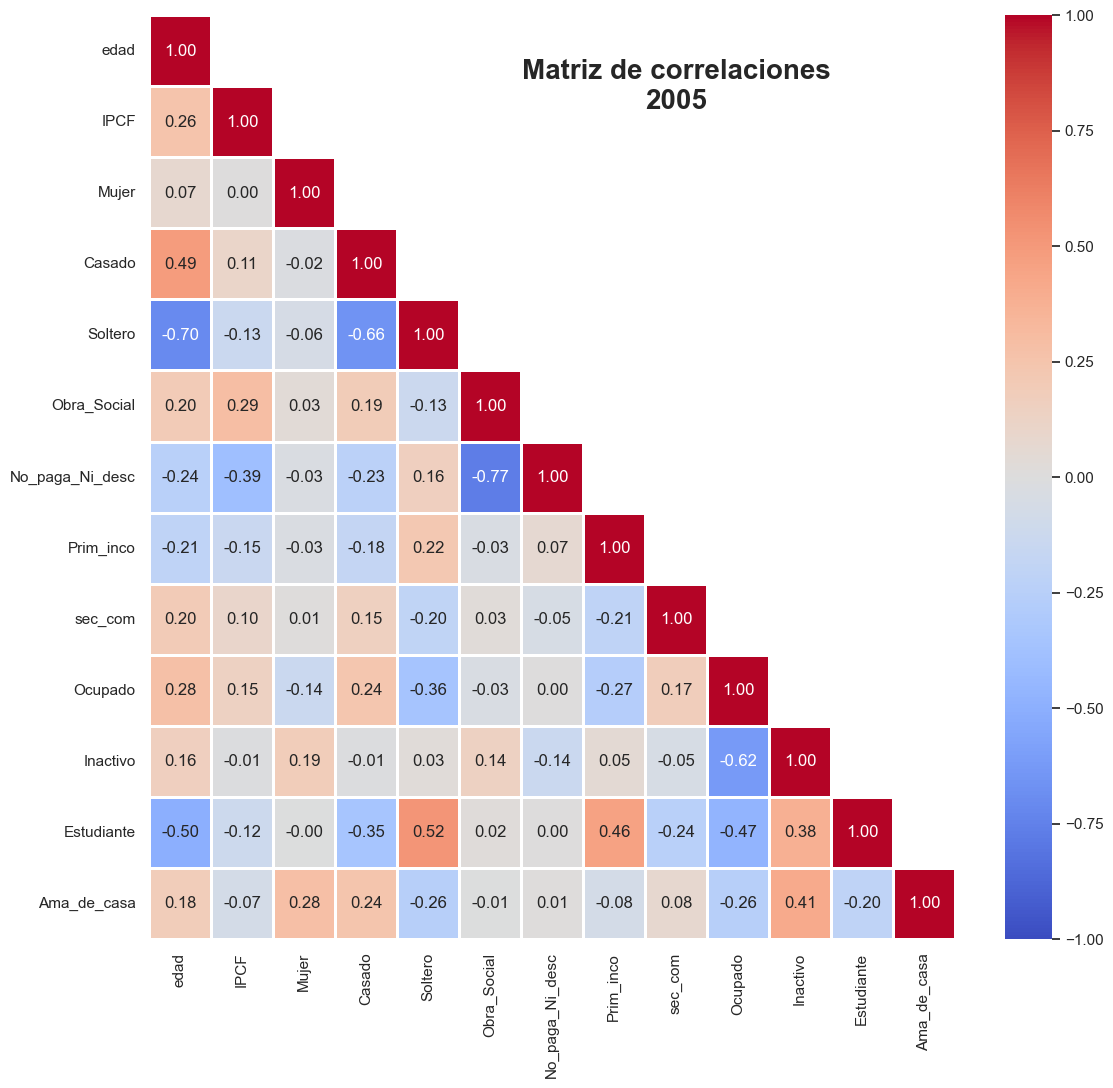

In [49]:
###creamos el grafico de correlaciones para 2005 año

upp_mat = np.triu(df_seleccionado_2005cor.corr())
plt.figure(figsize=(13, 12))
upp_mat = np.triu(df_seleccionado_2005cor.corr(),k=1)
sns.heatmap(df_seleccionado_2005cor.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt=".2f",linewidths=1, mask = upp_mat)
plt.text(x=8.5,  y=1,  s='Matriz de correlaciones\n2005',horizontalalignment='center',verticalalignment='center', fontsize=20,fontweight='bold')
plt.gca().grid(False)



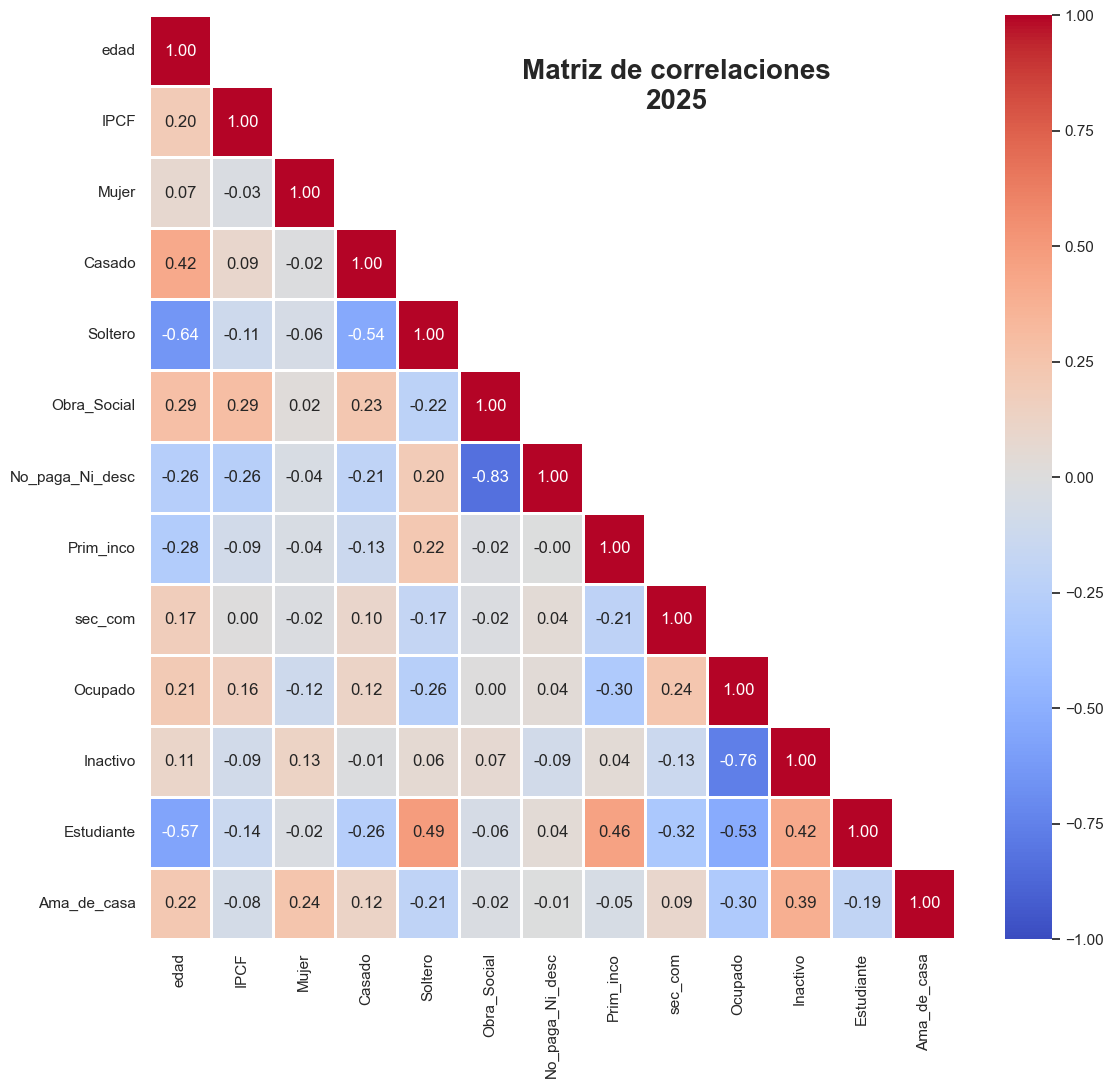

In [50]:
###creamos el grafico de correlaciones para 2025 año

upp_mat = np.triu(df_seleccionado_2025cor.corr())
plt.figure(figsize=(13, 12))
upp_mat = np.triu(df_seleccionado_2025cor.corr(),k=1)
sns.heatmap(df_seleccionado_2025cor.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt=".2f", mask = upp_mat,linewidths=1)
plt.text(x=8.5,  y=1,  s='Matriz de correlaciones\n2025',horizontalalignment='center',verticalalignment='center', fontsize=20,fontweight='bold')

plt.gca().grid(False)

# Parte 3  

 Ver los resultados de la región y compararlos entre 2005 y 2025.

### Punto 5  

Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos.  

- ¿Cuántas personas no respondieron cuál es su condición de actividad?  
- Guarden como una base distinta, llamada `respondieron`, las observaciones donde respondieron la pregunta sobre su ingreso total familiar (`ITF`).  
- Las observaciones con `ITF = 0` guárdenlas en una base bajo el nombre `norespondieron`.

In [51]:
### A partir de la creacion de las variables dummies puedo calcular la cantidad de gente que no respondio la encuesta

no_resp_2005 = df_2005_dummies['No_resp'].sum()
no_resp_2025 = df_2025_dummies['No_resp'].sum()
print(no_resp_2005)
print(no_resp_2025)

8
16


In [52]:
## separamos las dos bases de datos
respondieron = sel_indiv[sel_indiv['ITF'] != 0]  
norespondieron = sel_indiv[sel_indiv['ITF'] == 0] 

## separamos para cada año 

respondieron2005 = sel_t0105[sel_t0105['ITF'] != 0]  
norespondieron2005 = sel_t0105[sel_t0105['ITF'] == 0] 

respondieron2025 = sel_t0125[sel_t0125['ITF'] != 0]  
norespondieron2025 = sel_t0125[sel_t0125['ITF'] == 0] 
## Printeamos las bases individuales
pd.reset_option('display.max_rows')
print(respondieron)
print(norespondieron)

                              CODUSU  NRO_HOGAR  AGLOMERADO  PONDERA  CH03  \
0      TQRMNORWTHJOKOCDEGPDJ00875828          1          19      200     1   
1      TQRMNORWTHJOKOCDEGPDJ00875828          1          19      200     3   
2      TQRMNORWTHJOKOCDEGPDJ00875828          1          19      200     5   
3      TQRMNORWTHJOKOCDEGPDJ00875828          1          19      200     5   
4      TQRMNORWTHJOKOCDEGPDJ00875828          1          19      200     5   
...                              ...        ...         ...      ...   ...   
18867                       287879            1          29      266     3   
18868                       288077            1          29      555     1   
18869                       288077            1          29      555     2   
18870                       288077            1          29      555     3   
18871                       288077            1          29      555     3   

       CH04  CH06  CH07  CH08  CH14  NIVEL_ED  ESTADO  CAT_OCUP

### Punto 6  

Utilizando el archivo `tabla_adulto_equiv.xlsx`, agreguen a su base de datos una columna llamada `adulto_equiv` que contenga los valores de adulto equivalente de cada persona según su sexo y edad (por ejemplo, a un varón de 2 años le corresponde 0.46).  

Finalmente, con el comando `groupby`, sumen esta nueva columna para las personas que pertenecen a un mismo hogar y guarden ese dato en una columna llamada `ad_equiv_hogar`.

In [53]:
#Ahora uno a las 2 bases de datos individuales del 2.a con una columa de año

sel_t0105 = sel_t0105.copy(); sel_t0105["año"] = 2005 
sel_t0125 = sel_t0125.copy(); sel_t0125["año"] = 2025 

Sel_indiv = pd.concat([sel_t0105, sel_t0125], ignore_index=True)

Sel_indiv

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,ITF,año
0,125666,1,18,301,1,1,36,1,4,2,3,1,3,NaN,9201,140,700,2005
1,125666,1,18,301,2,0,35,1,4,NaN,2,3,NaN,4,NaN,140,700,2005
2,125666,1,18,301,3,0,15,5,4,1,3,3,NaN,3,NaN,140,700,2005
3,125666,1,18,301,3,1,12,5,4,8,3,3,NaN,3,NaN,140,700,2005
4,125666,1,18,301,3,1,10,5,4,5,1,3,NaN,3,NaN,140,700,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,0,90,4,1,NaN,4,3,NaN,1,NaN,1250000,3750000,2025
18868,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,0,60,5,1,NaN,6,1,3,NaN,8501,1250000,3750000,2025
18869,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,0,22,5,1,3,5,3,NaN,3,NaN,1250000,3750000,2025
18870,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,1,25,1,4,NaN,2,1,3,NaN,5601,537500,1075000,2025


In [54]:
df = Sel_indiv.copy()

# 1) Forzar numérico
df["CH04"] = pd.to_numeric(df["CH04"], errors="coerce")   # 1=varón, 0=mujer
df["CH06"] = pd.to_numeric(df["CH06"], errors="coerce")   # edad (puede venir 29.0)


# 3) Redondear edad a años enteros (por si tuviera decimales)
df["CH06"] = df["CH06"].round()

# 4) Eliminar filas con faltantes en CH04 o CH06
before = len(df)
df = df.dropna(subset=["CH04", "CH06"]).copy()
removed = before - len(df)
print(f"Filas eliminadas por faltantes/valores inválidos en CH04/CH06: {removed}")

# 5) Convertir a enteros “duros” para merges
df["CH04"] = df["CH04"].astype("int64")
df["CH06"] = df["CH06"].astype("int64")

# 6) Actualizar base
Sel_indiv = df

# 7) Chequeos rápidos
print(Sel_indiv[["CH04","CH06"]].dtypes)
print("Rango de edad final:", Sel_indiv["CH06"].min(), "→", Sel_indiv["CH06"].max())
print("Distribución CH04:", Sel_indiv["CH04"].value_counts().sort_index().to_dict())


Filas eliminadas por faltantes/valores inválidos en CH04/CH06: 0
CH04    int64
CH06    int64
dtype: object
Rango de edad final: 1 → 96
Distribución CH04: {0: 9793, 1: 9079}


In [55]:
df

,CODUSU,NRO_HOGAR,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP04B_COD,IPCF,ITF,año
0,125666,1,18,301,1,1,36,1,4,2,3,1,3,NaN,9201,140,700,2005
1,125666,1,18,301,2,0,35,1,4,NaN,2,3,NaN,4,NaN,140,700,2005
2,125666,1,18,301,3,0,15,5,4,1,3,3,NaN,3,NaN,140,700,2005
3,125666,1,18,301,3,1,12,5,4,8,3,3,NaN,3,NaN,140,700,2005
4,125666,1,18,301,3,1,10,5,4,5,1,3,NaN,3,NaN,140,700,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18867,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,1,0,90,4,1,NaN,4,3,NaN,1,NaN,1250000,3750000,2025
18868,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,3,0,60,5,1,NaN,6,1,3,NaN,8501,1250000,3750000,2025
18869,TQRMNOQYSHMKKRCDEHIBB00882443,1,22,184,5,0,22,5,1,3,5,3,NaN,3,NaN,1250000,3750000,2025
18870,TQRMNOPPVHKOKSCDEHIBB00860370,1,22,108,1,1,25,1,4,NaN,2,1,3,NaN,5601,537500,1075000,2025


In [56]:
tab = pd.read_excel(r"C:\Users\Rafael\Desktop\tpfinal\BigDataUBA-Grupo3-main\TP1-Grupo3\TP2\tabla_adulto_equiv.xlsx")
print (tab.columns)
pd.set_option('display.float_format', '{:.2f}'.format)

tab

Index(['Edad', 'Mujeres', 'Varones'], dtype='object')


,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


In [57]:
import re, unicodedata
pd.set_option('display.float_format', '{:.2f}'.format)

# normalizador suave (quita acentos/nbspace, baja a minúsculas)
def _norm(s):
    s = unicodedata.normalize("NFKD", str(s))
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    s = s.replace("\u00a0"," ").strip().lower()
    s = re.sub(r"\s+", " ", s)
    return s

# parser de la columna "Edad" según el Excel (cubre: "1año", "2 años", "18 a 29 años", "más de 75 años", "menor de 1 año")
def _parse_edad_cell(x, max_age=96):
    s = _norm(x).replace("más","mas").replace("años","anos").replace("año","ano")
    if s in {"menos de 1", "menor de 1", "menores de 1", "<1", "menos de 1 ano"}:
        return (None, None)                 # arrancamos en 1, así que lo ignoramos
    # "lo a hi" o "lo-hi"
    m = re.match(r"^(\d+)\s*(?:a|-|–|—)\s*(\d+)", s)
    if m: return int(m.group(1)), int(m.group(2))
    # "lo+"  | "lo y mas"
    m = re.match(r"^(\d+)\s*\+$", s) or re.match(r"^(\d+)\s*y\s*mas$", s)
    if m: return int(m.group(1)), max_age
    # "mas de lo"
    m = re.match(r"^mas\s+de\s+(\d+)", s)
    if m: return int(m.group(1)) + 1, max_age
    # un solo número con o sin "ano(s)" pegado o con espacio: "1año", "2 anos", "3"
    m = re.match(r"^(\d+)\s*(?:ano|anos)?$", s)
    if m: 
        v = int(m.group(1)); 
        return v, v
    return (None, None)

MIN_AGE, MAX_AGE = 1, 96

rows = []
for _, r in tab[["Edad","Mujeres","Varones"]].iterrows():
    lo, hi = _parse_edad_cell(r["Edad"], max_age=MAX_AGE)
    if lo is None or hi is None:
        continue
    lo = max(MIN_AGE, lo)
    hi = min(MAX_AGE, hi)
    if hi < lo:
        continue
    for age in range(lo, hi+1):
        rows.append((age, r["Mujeres"], r["Varones"]))

tab_exp = (pd.DataFrame(rows, columns=["edad","mujeres","varones"])
             .drop_duplicates("edad")
             .sort_values("edad")
             .reset_index(drop=True))

# chequeo de cobertura
faltan = [e for e in range(MIN_AGE, MAX_AGE+1) if e not in set(tab_exp["edad"].tolist())]
print(f"Edades cubiertas: {tab_exp['edad'].min()} → {tab_exp['edad'].max()}")
print("¿Faltan edades (1..96)?", len(faltan), "| ejemplos:", faltan[:15])

Edades cubiertas: 1 → 96
¿Faltan edades (1..96)? 0 | ejemplos: []


In [58]:
tab_exp.head

<bound method NDFrame.head of     edad  mujeres  varones
0      1     0.37     0.37
1      2     0.46     0.46
2      3     0.51     0.51
3      4     0.55     0.55
4      5     0.60     0.60
..   ...      ...      ...
91    92     0.63     0.74
92    93     0.63     0.74
93    94     0.63     0.74
94    95     0.63     0.74
95    96     0.63     0.74

[96 rows x 3 columns]>

In [59]:
# Creo adulto_equiv en la base (CH04=1 varón, 0 mujer; CH06=edad)
Sel_indiv = Sel_indiv.copy()
Sel_indiv["CH04"] = pd.to_numeric(Sel_indiv["CH04"], errors="coerce").astype("Int64")   # 1 varón, 0 mujer
Sel_indiv["CH06"] = pd.to_numeric(Sel_indiv["CH06"], errors="coerce").round().astype("Int64")

# diccionarios edad -> valor
map_varon = dict(zip(tab_exp["edad"], tab_exp["varones"]))
map_mujer = dict(zip(tab_exp["edad"], tab_exp["mujeres"]))

# construir la columna (tolerante a NaN)
Sel_indiv["adulto_equiv"] = pd.Series(pd.NA, index=Sel_indiv.index, dtype="Float64")
m_v = Sel_indiv["CH04"].eq(1) & Sel_indiv["CH06"].notna()
m_m = Sel_indiv["CH04"].eq(0) & Sel_indiv["CH06"].notna()
Sel_indiv.loc[m_v, "adulto_equiv"] = Sel_indiv.loc[m_v, "CH06"].map(map_varon).to_numpy()
Sel_indiv.loc[m_m, "adulto_equiv"] = Sel_indiv.loc[m_m, "CH06"].map(map_mujer).to_numpy()

# chequeo breve
print("Sin match (faltantes o edades fuera de 1–96):", int(Sel_indiv["adulto_equiv"].isna().sum()))

Sin match (faltantes o edades fuera de 1–96): 0


In [60]:
# asegurar tipos de las llaves del hogar
Sel_indiv = Sel_indiv.copy()
Sel_indiv["NRO_HOGAR"] = pd.to_numeric(Sel_indiv["NRO_HOGAR"], errors="coerce").astype("Int64")
Sel_indiv["CODUSU"]    = Sel_indiv["CODUSU"].astype(str)

keys = ["CODUSU", "NRO_HOGAR"]

# suma por hogar (con min_count=1 por si alguna vez hubiera todos NaN)
agg = (Sel_indiv
       .groupby(keys, dropna=False)["adulto_equiv"]
       .sum(min_count=1)
       .rename("ad_equiv_hogar")
       .reset_index())

Sel_indiv = Sel_indiv.merge(agg, on=keys, how="left")

# chequeo rápido
Sel_indiv[keys + ["adulto_equiv", "ad_equiv_hogar"]].head()

,CODUSU,NRO_HOGAR,adulto_equiv,ad_equiv_hogar
0,125666,1,1.00,4.18
1,125666,1,0.77,4.18
2,125666,1,0.77,4.18
3,125666,1,0.85,4.18
4,125666,1,0.79,4.18


In [61]:
# Personas con su adulto_equiv (ordenado por hogar)
cols = ["CODUSU", "NRO_HOGAR", "CH06", "CH04", "adulto_equiv"]
vista_personas = (Sel_indiv[cols]
                  .sort_values(["CODUSU","NRO_HOGAR"])
                  .reset_index(drop=True))
vista_personas.head(20)   

,CODUSU,NRO_HOGAR,CH06,CH04,adulto_equiv
0,125029,1,58,1,1.00
1,125029,1,55,0,0.76
2,125029,1,24,0,0.76
3,125029,1,26,1,1.02
4,125029,1,79,0,0.63
5,125078,1,83,0,0.63
6,125078,1,50,0,0.76
7,125078,1,24,0,0.76
8,125078,1,22,0,0.76
9,125078,1,15,0,0.77


In [62]:
hogares = (Sel_indiv
           .groupby(["CODUSU","NRO_HOGAR"], dropna=False, as_index=False)
           .agg(ad_equiv_hogar=("adulto_equiv","sum")))

hogares.head(20)

,CODUSU,NRO_HOGAR,ad_equiv_hogar
0,125029,1,4.17
1,125078,1,3.68
2,125297,1,3.08
3,125335,1,1.79
4,125415,1,3.29
5,125463,1,3.44
6,125666,1,4.18
7,125725,1,1.50
8,125850,1,2.97
9,125940,1,3.29


In [63]:
print (Sel_indiv) #para chequear nomás

                              CODUSU  NRO_HOGAR  AGLOMERADO  PONDERA  CH03  \
0                           125666            1          18   301.00     1   
1                           125666            1          18   301.00     2   
2                           125666            1          18   301.00     3   
3                           125666            1          18   301.00     3   
4                           125666            1          18   301.00     3   
...                              ...        ...         ...      ...   ...   
18867  TQRMNOQYSHMKKRCDEHIBB00882443          1          22   184.00     1   
18868  TQRMNOQYSHMKKRCDEHIBB00882443          1          22   184.00     3   
18869  TQRMNOQYSHMKKRCDEHIBB00882443          1          22   184.00     5   
18870  TQRMNOPPVHKOKSCDEHIBB00860370          1          22   108.00     1   
18871  TQRMNOPPVHKOKSCDEHIBB00860370          1          22   108.00     2   

       CH04  CH06  CH07  CH08  CH14  NIVEL_ED  ESTADO  CAT_OCUP

### Punto 7  

Sabiendo que la Canasta Básica Total para un adulto equivalente en el primer trimestre de 2025 es aproximadamente `$365.177`, agreguen a la base `respondieron` una columna llamada `ingreso_necesario` que sea el producto de este valor por `ad_equiv_hogar`.  

Para el primer trimestre de 2005, la Canasta Básica Total para un adulto equivalente era aproximadamente `$205,07`.  
Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [64]:
# Mapa de Canasta Básica Total por adulto equivalente
CBT_AE = {2005: 205.07, 2025: 365_177.0}

df = Sel_indiv.copy()

# Aseguro que 'año' sea numérico (por si vino como string)
df["año"] = pd.to_numeric(df["año"], errors="coerce").astype("Int64")

# Traigo la CBT del año y calculo ingreso_necesario
df["CBT_AE"] = df["año"].map(CBT_AE).astype("Float64")
df["ingreso_necesario"] = (df["ad_equiv_hogar"] * df["CBT_AE"]).round(2).astype("Float64")

# Actualizo 
Sel_indiv = df

# Chequeo rápido por año
print(
    Sel_indiv.groupby("año")["ingreso_necesario"]
    .agg(["count","min","median","max"])
    .round(2)
)
Sel_indiv[["CODUSU","NRO_HOGAR","año","ad_equiv_hogar","ingreso_necesario"]].head(10)

      count       min     median        max
año                                        
2005   9182    129.19     781.32    2540.82
2025   9690 230061.51 1197780.56 3973125.76


,CODUSU,NRO_HOGAR,año,ad_equiv_hogar,ingreso_necesario
0,125666,1,2005,4.18,857.19
1,125666,1,2005,4.18,857.19
2,125666,1,2005,4.18,857.19
3,125666,1,2005,4.18,857.19
4,125666,1,2005,4.18,857.19
5,126344,1,2005,2.79,572.15
6,126344,1,2005,2.79,572.15
7,126344,1,2005,2.79,572.15
8,127081,1,2005,1.39,285.05
9,127081,1,2005,1.39,285.05


### Punto 8  

Por último, agreguen a `respondieron` una columna llamada `pobre` que tome valor `1` si el `ITF` es menor al ingreso necesario que necesita esa familia, y `0` en caso contrario.  

- ¿Cuántos pobres identificaron para cada año?  
- ¿Qué porcentaje de la muestra representa?

In [65]:
df = Sel_indiv.copy()

# --- Tipos y llaves hogar ---
df["CODUSU"]    = df["CODUSU"].astype(str)
df["NRO_HOGAR"] = pd.to_numeric(df["NRO_HOGAR"], errors="coerce").astype("Int64")
df["año"]       = pd.to_numeric(df["año"], errors="coerce").astype("Int64")
keys = ["año","CODUSU","NRO_HOGAR"]

# --- Miembros del hogar ---
df["miembros_hogar"] = df.groupby(keys)["CODUSU"].transform("size")

# --- Ingreso del hogar: ITF si existe; si no, IPCF * miembros ---
if "ITF" in df.columns:
    df["ITF"] = pd.to_numeric(df["ITF"], errors="coerce")
    df["ingreso_hogar"] = df.groupby(keys)["ITF"].transform(lambda s: s.dropna().iloc[0] if not s.dropna().empty else np.nan)
else:
    if "IPCF" not in df.columns:
        raise ValueError("No hay ITF ni IPCF para estimar ingreso del hogar.")
    df["IPCF"] = pd.to_numeric(df["IPCF"], errors="coerce")
    df["ingreso_hogar"] = (df["IPCF"] * df["miembros_hogar"]).astype("Float64")


# --- Flag de pobreza (1 si ITF/ingreso_hogar < ingreso_necesario; 0 en caso contrario) ---
mask = df["ingreso_hogar"].notna() & df["ingreso_necesario"].notna()
df["pobre"] = pd.Series(pd.NA, index=df.index, dtype="Int64")
df.loc[mask, "pobre"] = (df.loc[mask, "ingreso_hogar"] < df.loc[mask, "ingreso_necesario"]).astype("Int64")

In [66]:
# --- Resumen por AÑO a nivel HOGAR ---
hogares = (df.groupby(keys, as_index=False)
               .agg(pobre=("pobre","first")))  # El valor es único por hogar

# Calcula las métricas por año de manera más eficiente
res = (hogares.groupby("año")["pobre"]
       .apply(lambda g: pd.Series({
           "hogares_total": len(g),
           "hogares_pobres": int((g == 1).sum()),
           "pct_pobres_sobre_muestra": round(100 * (g == 1).mean(), 2),
       }))
       .reset_index())

print("=== Resultado (hogares) por año ===")
print(res)

# Actualiza tu objeto de trabajo (asumiendo que `df` es el que usas)
Sel_indiv = df

=== Resultado (hogares) por año ===
    año                   level_1   pobre
0  2005             hogares_total 2333.00
1  2005            hogares_pobres  843.00
2  2005  pct_pobres_sobre_muestra   36.13
3  2025             hogares_total 3051.00
4  2025            hogares_pobres 1288.00
5  2025  pct_pobres_sobre_muestra   42.22


In [67]:
# vista rápida de columnas clave
Sel_indiv[["año","CODUSU","NRO_HOGAR","ad_equiv_hogar","ingreso_hogar","ingreso_necesario","pobre"]].head(12)

,año,CODUSU,NRO_HOGAR,ad_equiv_hogar,ingreso_hogar,ingreso_necesario,pobre
0,2005,125666,1,4.18,700.00,857.19,1
1,2005,125666,1,4.18,700.00,857.19,1
2,2005,125666,1,4.18,700.00,857.19,1
3,2005,125666,1,4.18,700.00,857.19,1
4,2005,125666,1,4.18,700.00,857.19,1
5,2005,126344,1,2.79,3800.00,572.15,0
6,2005,126344,1,2.79,3800.00,572.15,0
7,2005,126344,1,2.79,3800.00,572.15,0
8,2005,127081,1,1.39,279.00,285.05,1
9,2005,127081,1,1.39,279.00,285.05,1


### Punto 9  

Muestren estadísticas descriptivas relevantes de la variable `pobre` en una tabla, comparando 2005 con 2025.  

Además, hagan 2 gráficos exploratorios a elección usando la variable `pobre`.  

Comenten los resultados.

In [68]:
df = Sel_indiv.copy()

# Aseguro tipos mínimos
df["año"]       = pd.to_numeric(df["año"], errors="coerce").astype("Int64")
df["CODUSU"]    = df["CODUSU"].astype(str)
df["NRO_HOGAR"] = pd.to_numeric(df["NRO_HOGAR"], errors="coerce").astype("Int64")
df["pobre"]     = pd.to_numeric(df["pobre"], errors="coerce").astype("Int64")  # 1/0/NA

# Nivel HOGAR
# Una fila por hogar-año, y 'pobre' único por hogar
hogares = (df.groupby(["año","CODUSU","NRO_HOGAR"], as_index=False)
             .agg(pobre=("pobre","first")))

tab_hog = (hogares.groupby("año")
           .agg(hogares_total   = ("pobre","size"),
                hogares_validos = ("pobre", lambda s: s.notna().sum()),
                hogares_pobres  = ("pobre", lambda s: (s == 1).sum()))
           .reset_index())
tab_hog["% hogares pobres (muestra)"] = (100 * tab_hog["hogares_pobres"] / tab_hog["hogares_validos"]).round(2)

# Nivel PERSONA
tab_per = (df.groupby("año")
           .agg(personas_total   = ("pobre","size"),
                personas_validas = ("pobre", lambda s: s.notna().sum()),
                personas_pobres  = ("pobre", lambda s: (s == 1).sum()))
           .reset_index())
tab_per["% personas en hogares pobres (muestra)"] = (100 * tab_per["personas_pobres"] / tab_per["personas_validas"]).round(2)


# Mostramos ambas: por separado y combinada
print("=== Hogares (muestra) ===")
display(tab_hog)
print("\n=== Personas (muestra) ===")
display(tab_per)

=== Hogares (muestra) ===


,año,hogares_total,hogares_validos,hogares_pobres,% hogares pobres (muestra)
0,2005,2333,2333,843,36.13
1,2025,3051,3051,1288,42.22



=== Personas (muestra) ===


,año,personas_total,personas_validas,personas_pobres,% personas en hogares pobres (muestra)
0,2005,9182,9182,4098,44.63
1,2025,9690,9690,4909,50.66


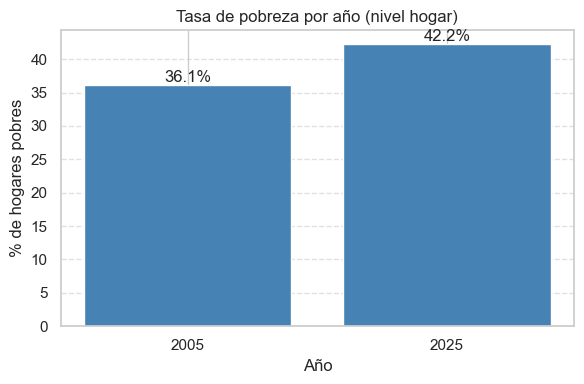

In [73]:
# Copia de trabajo y tipos mínimos
df = Sel_indiv.copy()
df["año"] = pd.to_numeric(df["año"], errors="coerce")
df["pobre"] = pd.to_numeric(df["pobre"], errors="coerce")  # 1/0/NaN

#  Una fila por hogar-año y valor único de 'pobre'
hog = (df.groupby(["año","CODUSU","NRO_HOGAR"], as_index=False)
          .agg(pobre=("pobre","first")))

#  Tasa de pobreza (% de hogares pobres) por año, sobre hogares con dato válido
rates = (hog.dropna(subset=["pobre"])
            .groupby("año")["pobre"]
            .mean()
            .mul(100)
            .sort_index())

# --- Gráfico de barras ---
plt.figure(figsize=(6,4))
xticks = rates.index.astype(int).astype(str)
plt.bar(xticks, rates.values, color='#4682B4')  # Color azul pastel oscuro
plt.title("Tasa de pobreza por año (nivel hogar)")
plt.ylabel("% de hogares pobres")
plt.xlabel("Año")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Anotar valores sobre cada barra
for x, y in zip(range(len(xticks)), rates.values):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


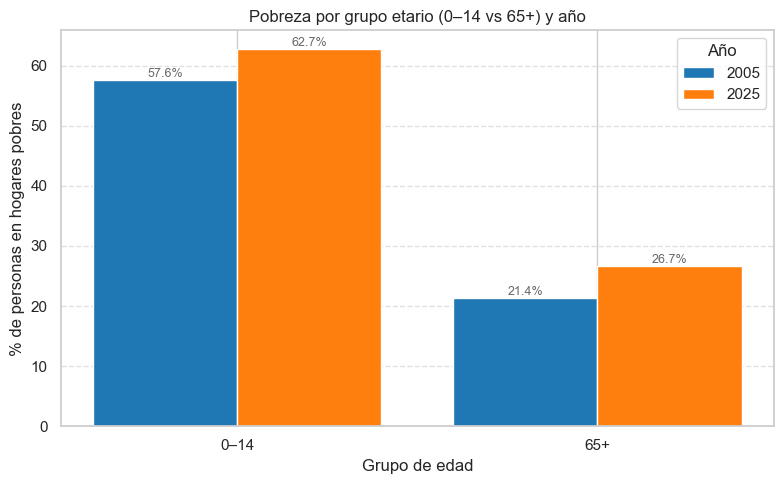

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# --- copia y tipos mínimos ---
df = Sel_indiv.copy()
df["año"] = pd.to_numeric(df["año"], errors="coerce")
df["CH06"] = pd.to_numeric(df["CH06"], errors="coerce")
df["pobre"] = pd.to_numeric(df["pobre"], errors="coerce")

# me quedo solo con personas con dato de pobre y edad
df_age = df.dropna(subset=["año", "CH06", "pobre"]).copy()

# dos grupos etarios: 0–14 y 65+ (descartamos el resto)
df_age["grupo"] = pd.Series(pd.NA, index=df_age.index, dtype="object")
df_age.loc[df_age["CH06"].between(0, 14, inclusive="both"), "grupo"] = "0–14"
df_age.loc[df_age["CH06"] >= 65, "grupo"] = "65+"
df_age = df_age.dropna(subset=["grupo"])

# tasa (% personas en hogares pobres) por grupo y año
rates = (df_age.groupby(["grupo", "año"])["pobre"].mean() * 100).unstack("año").sort_index()

# gráfico de barras agrupadas
pos = np.arange(len(rates.index))
years = rates.columns.tolist()
nY = len(years)
width = 0.8 / max(nY, 1)

plt.figure(figsize=(8, 5)) 

# Colores para el gráfico: un azul oscuro y un naranja fuerte
colors = ['#1f77b4', '#ff7f0e']

for i, yr in enumerate(years):
    vals = rates[yr].values
    plt.bar(pos + i * width, vals, width=width, label=str(int(yr)), color=colors[i])

plt.xticks(pos + width * (nY - 1) / 2, rates.index.astype(str))
plt.ylabel("% de personas en hogares pobres")
plt.xlabel("Grupo de edad")
plt.title("Pobreza por grupo etario (0–14 vs 65+) y año")
plt.legend(title="Año")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# anoto valores arriba de cada barra
for i, yr in enumerate(years):
    vals = rates[yr].values
    for j, y in enumerate(vals):
        plt.text(pos[j] + i * width, y, f"{y:.1f}%", ha="center", va="bottom", fontsize=9, color='dimgray')

plt.tight_layout()
plt.show()